In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft, rfftfreq
from matplotlib.colors import LogNorm
from itertools import combinations
import sys, os

parent_directory = os.path.dirname(os.getcwd())
sys.path.append(parent_directory)
import telescope_1d
from scipy.stats import norm
%matplotlib inline
from multiprocessing import Pool
P = Pool(processes=8)

We plot the power spectra in the Fourier domain. We plot the shortest, mid-length, and the longest baseline.

1097.9577799797398 0.9992057508760153


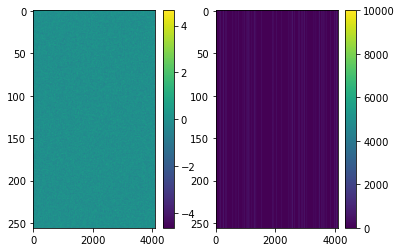

In [8]:
# Initialize non-redundant telescope array
ndishes = 8
npix = 4096
redundant = True
seed = 1
t = telescope_1d.Telescope1D(Ndishes=ndishes, Npix_fft=npix, redundant=redundant, seed=seed)

# Generate sky (foregrounds; white noise in angle but frequncy independent)
#sky = t.get_uniform_sky(seed=seed)
#sky = t.get_gaussian_sky(seed=seed)
sky = t.get_point_source_sky(seed=seed)
    
# Generate signal (white noise in both freqency and angle)
np.random.seed(seed)
signal = np.random.normal(0,1,(t.Nfreq,t.Npix))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(signal,aspect='auto')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.outer(np.ones(t.Nfreq),sky),aspect='auto')
plt.colorbar()

print(np.sqrt(sky.var()),np.sqrt(signal.var()))

In [11]:
# Convolve and convert image to uvplane
uvsky = t.observe_image(sky)
uvsig = t.observe_image(signal)

In [12]:
# Get observed uvplane
uvplane_sky, uvplane_skyf, uvplane_skyf1 = t.get_obs_uvplane(uvsky, time_error_sigma=0, filter_FG=True)
uvplane_sig, uvplane_sigf, uvplane_sigf1 = t.get_obs_uvplane(uvsig, time_error_sigma=0, filter_FG=True)

uvplane_sky_e, uvplane_skyf_e, uvplane_skyf1_e = t.get_obs_uvplane(uvsky, time_error_sigma=10e-12, filter_FG=True)
uvplane_sig_e, uvplane_sigf_e, uvplane_sigf1_e = t.get_obs_uvplane(uvsig, time_error_sigma=10e-12, filter_FG=True)


caching matrix
Filtered 248 modes.
caching matrices
Filtered 43 modes for baseline 0.
Filtered 61 modes for baseline 1.
Filtered 76 modes for baseline 2.
Filtered 91 modes for baseline 3.
Filtered 106 modes for baseline 4.
Filtered 121 modes for baseline 5.
Filtered 137 modes for baseline 6.
Filtered 248 modes.
Filtered 43 modes for baseline 0.
Filtered 61 modes for baseline 1.
Filtered 76 modes for baseline 2.
Filtered 91 modes for baseline 3.
Filtered 106 modes for baseline 4.
Filtered 121 modes for baseline 5.
Filtered 137 modes for baseline 6.
Filtered 248 modes.
Filtered 43 modes for baseline 0.
Filtered 61 modes for baseline 1.
Filtered 76 modes for baseline 2.
Filtered 91 modes for baseline 3.
Filtered 106 modes for baseline 4.
Filtered 121 modes for baseline 5.
Filtered 137 modes for baseline 6.
Filtered 248 modes.
Filtered 43 modes for baseline 0.
Filtered 61 modes for baseline 1.
Filtered 76 modes for baseline 2.
Filtered 91 modes for baseline 3.
Filtered 106 modes for baseli

In [13]:
# Power spectra of foregrounds, filtered foregrounds, signal, filtered signal
(ps_sky, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sky, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)
(ps_sig, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sig, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)
(ps_skyf1, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_skyf1, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)
(ps_sigf1, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sigf1, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)
(ps_skyf, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_skyf, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)
(ps_sigf, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sigf, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)

(ps_sky_e, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sky_e, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)
(ps_sig_e, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sig_e, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)
(ps_skyf1_e, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_skyf1_e, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)
(ps_sigf1_e, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sigf1_e, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)
(ps_skyf_e, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_skyf_e, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)
(ps_sigf_e, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sigf_e, Nfreqchunks=4, m_baselines=1, m_freq=1, padding=1, window_fn=np.blackman)




/opt/conda/lib/python3.8/site-packages/numpy/fft/_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


In [14]:
t.unique_baseline_lengths

array([ 6., 12., 18., 24., 30., 36., 42.])

[]

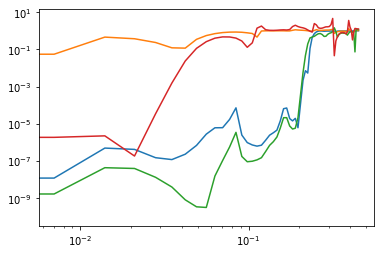

In [15]:
plt.plot(k_modes[3],ps_sigf[3][:,-1]/ps_sig[3][:,-1])
plt.plot(k_modes[3],ps_sigf[3][:,0]/ps_sig[3][:,0])

plt.plot(k_modes[3],ps_sigf1[3][:,-1]/ps_sig[3][:,-1])
plt.plot(k_modes[3],ps_sigf1[3][:,0]/ps_sig[3][:,0])


#plt.plot(k_modes[0],ps_sky_e[0][:,0])
#plt.plot(k_modes[0],ps_skyf_e[0][:,0])
#plt.plot(k_modes[0],ps_skyf1_e[0][:,0])



plt.loglog()

[]

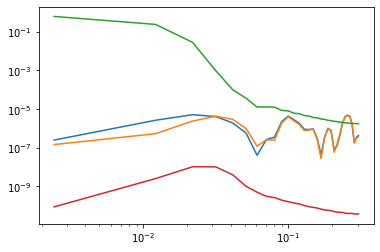

In [74]:
plt.plot(k_modes[0],ps_sig[0][:,0])
plt.plot(k_modes[0],ps_sigf[0][:,0])
plt.plot(k_modes[0],ps_sky[0][:,0])
plt.plot(k_modes[0],ps_skyf[0][:,0])


plt.loglog()

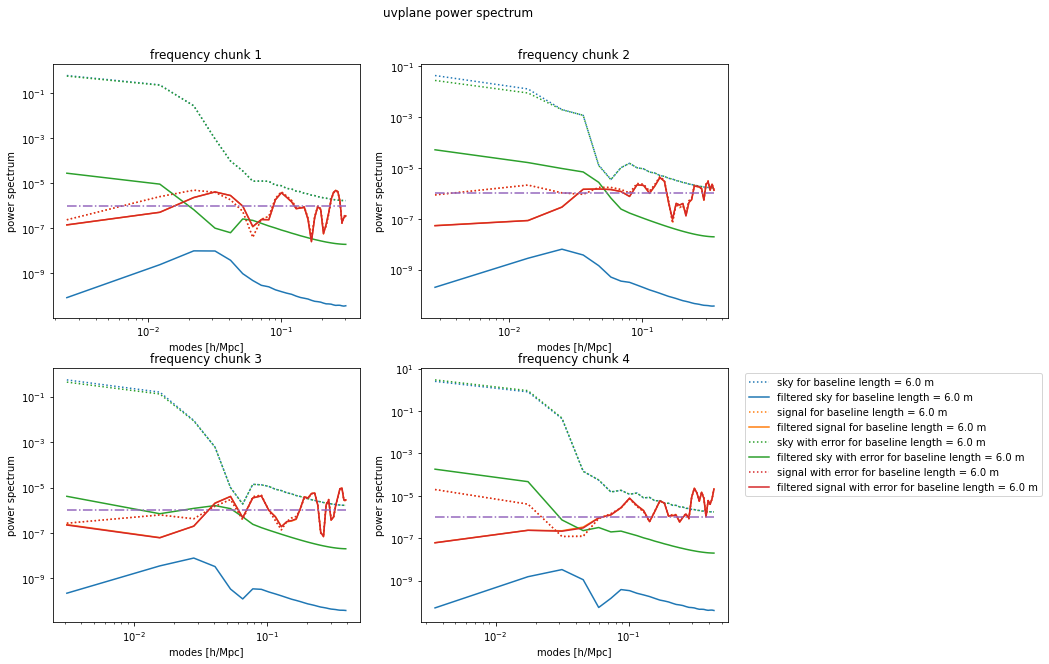

In [42]:
# Plot
Nfreqchunks = 4
#baselines = [0, t.unique_baseline_lengths.shape[0]//2, t.unique_baseline_lengths.shape[0]-1]
baselines = [0]#,t.unique_baseline_lengths.shape[0]-1]
fig = plt.figure(figsize=(15,10))
for i in range(Nfreqchunks):
    max_sky = 1 #np.max(ps_sky[i])
    max_sig = 1 #np.max(ps_sig[i])
    max_sky_error = 1 #np.max(ps_sky_error[i])
    max_sig_error = 1 #np.max(ps_sig_error[i])
    plt.subplot(2,Nfreqchunks//2,i+1)
    modes = k_modes[i]
    m = t.unique_baseline_lengths.shape[0]//baselines_binned.shape[0]
    ax = plt.gca()
    for b in baselines:
        baseline_idx_binned = b//m # Divide by the m argument of get_uvplane_ps
        bl = t.unique_baseline_lengths[b]
        # Without error
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sky[i][:,baseline_idx_binned]/max_sky,
                   linestyle=':', color=color, label=f'sky for baseline length = {bl} m')
        plt.loglog(modes, ps_skyf[i][:,baseline_idx_binned]/max_sky,
                   linestyle='-', color=color, label=f'filtered sky for baseline length = {bl} m')
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sig[i][:,baseline_idx_binned]/max_sig,
                   linestyle=':', color=color, label=f'signal for baseline length = {bl} m')
        plt.loglog(modes, ps_sigf[i][:,baseline_idx_binned]/max_sig,
                   linestyle='-', color=color, label=f'filtered signal for baseline length = {bl} m')
        # With error
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sky_error[i][:,baseline_idx_binned]/max_sky_error,
                   linestyle=':', color=color, label=f'sky with error for baseline length = {bl} m')
        plt.loglog(modes, ps_skyf_error[i][:,baseline_idx_binned]/max_sky_error,
                   linestyle='-', color=color, label=f'filtered sky with error for baseline length = {bl} m')
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sig_error[i][:,baseline_idx_binned]/max_sig_error,
                   linestyle=':', color=color, label=f'signal with error for baseline length = {bl} m')
        plt.loglog(modes, ps_sigf_error[i][:,baseline_idx_binned]/max_sig_error,
                   linestyle='-', color=color, label=f'filtered signal with error for baseline length = {bl} m')
    # Add line at 1e-6
    line = np.array([1e-6 for i in range(len(modes))])
    color = next(ax._get_lines.prop_cycler)['color']
    plt.loglog(modes, line, linestyle='-.', color=color)
    plt.xlabel('modes [h/Mpc]')
    plt.ylabel('power spectrum')
    #plt.ylim(1e-12, 1)
    plt.title('frequency chunk {}'.format(i+1))
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.9, right=0.75)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.suptitle('uvplane power spectrum')
plt.show()

/home/yuka/Winter 2021/radio1d/telescope_1d.py:730: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(gs[ncol-1])
/home/yuka/Winter 2021/radio1d/telescope_1d.py:731: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(gs[2*ncol-1])


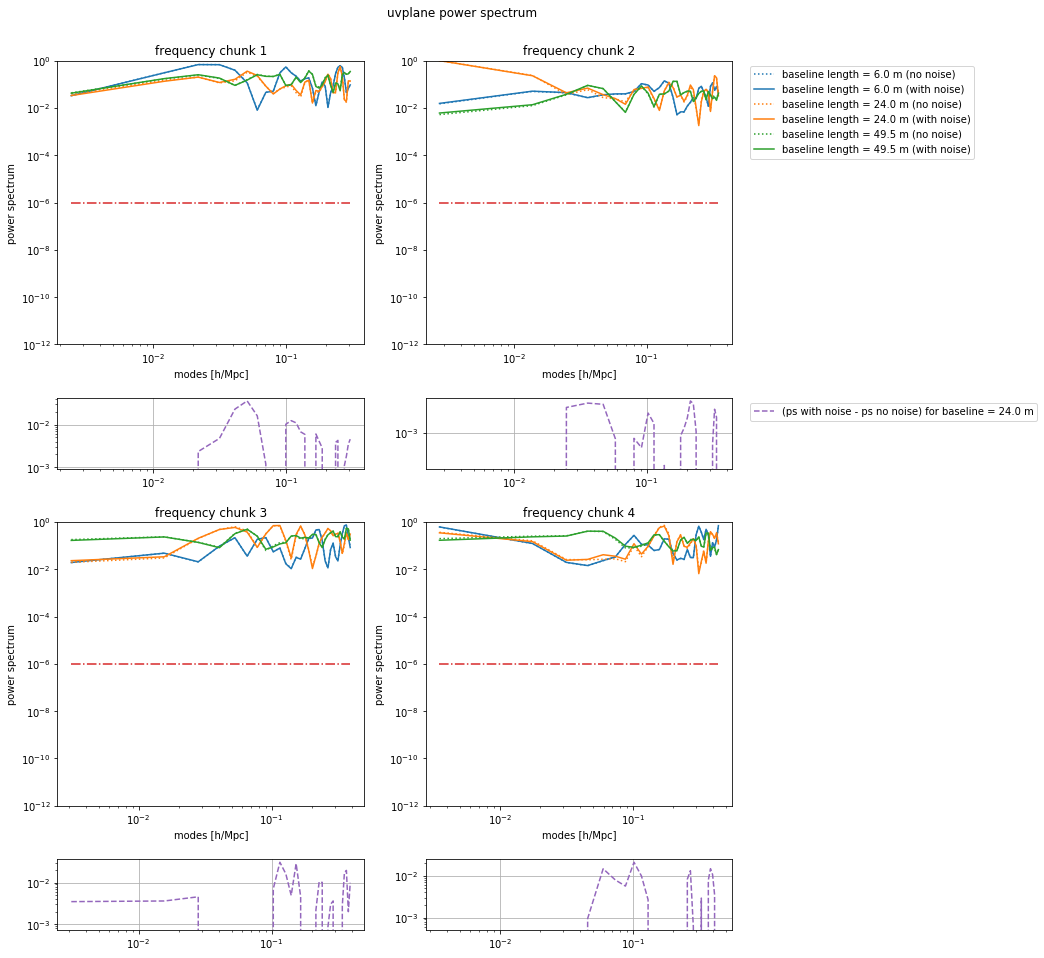

In [5]:
# Try plotting signal without error vs with error
fig = t.plot_uvplane_ps_slice(ps_sig,ps_sig_error,k_modes,baselines_binned)

In [8]:
# Initialize redundant telescope array
ndishes = 8
npix = 4096
redundant = True
seed = 0
t = telescope_1d.Telescope1D(Ndishes=ndishes, Npix_fft=npix, redundant=redundant, seed=seed)

# Generate sky (foregrounds; white noise in angle but frequncy independent)
sky = 1000*t.get_uniform_sky(high=2, seed=seed)
    
# Generate signal (white noise in both freqency and angle)
np.random.seed(seed)
signal = np.random.normal(0,1,(t.Nfreq,t.Npix))

# Convolve and convert image to uvplane
uvsky = t.observe_image(sky)
uvsig = t.observe_image(signal)

# Get observed uvplane
uvplane_sky = t.get_obs_uvplane(uvsky, time_error_sigma=0, filter_FG=False)
uvplane_sig = t.get_obs_uvplane(uvsig, time_error_sigma=0, filter_FG=False)
uvplane_skyf = t.get_obs_uvplane(uvsky, time_error_sigma=0, filter_FG=True)
uvplane_sigf = t.get_obs_uvplane(uvsig, time_error_sigma=0, filter_FG=True)
uvplane_sky_error = t.get_obs_uvplane(uvsky, time_error_sigma=10e-12, filter_FG=False)
uvplane_sig_error = t.get_obs_uvplane(uvsig, time_error_sigma=10e-12, filter_FG=False)
uvplane_skyf_error = t.get_obs_uvplane(uvsky, time_error_sigma=10e-12, filter_FG=True)
uvplane_sigf_error = t.get_obs_uvplane(uvsig, time_error_sigma=10e-12, filter_FG=True)

Filtered 248 modes.
Filtered 248 modes.
Filtered 248 modes.
Filtered 248 modes.


In [10]:
# Power spectra of foregrounds, filtered foregrounds, signal, filtered signal
(ps_sky, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sky, Nfreqchunks=4, m_baselines=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sig, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sig, Nfreqchunks=4, m_baselines=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_skyf, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_skyf, Nfreqchunks=4, m_baselines=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sigf, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sigf, Nfreqchunks=4, m_baselines=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sky_error, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sky_error, Nfreqchunks=4, m_baselines=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sig_error, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sig_error, Nfreqchunks=4, m_baselines=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_skyf_error, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_skyf_error, Nfreqchunks=4, m_baselines=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sigf_error, k_modes, baselines_binned) = t.get_uvplane_ps(uvplane_sigf_error, Nfreqchunks=4, m_baselines=2, m_freq=2, padding=1, window_fn=np.blackman)

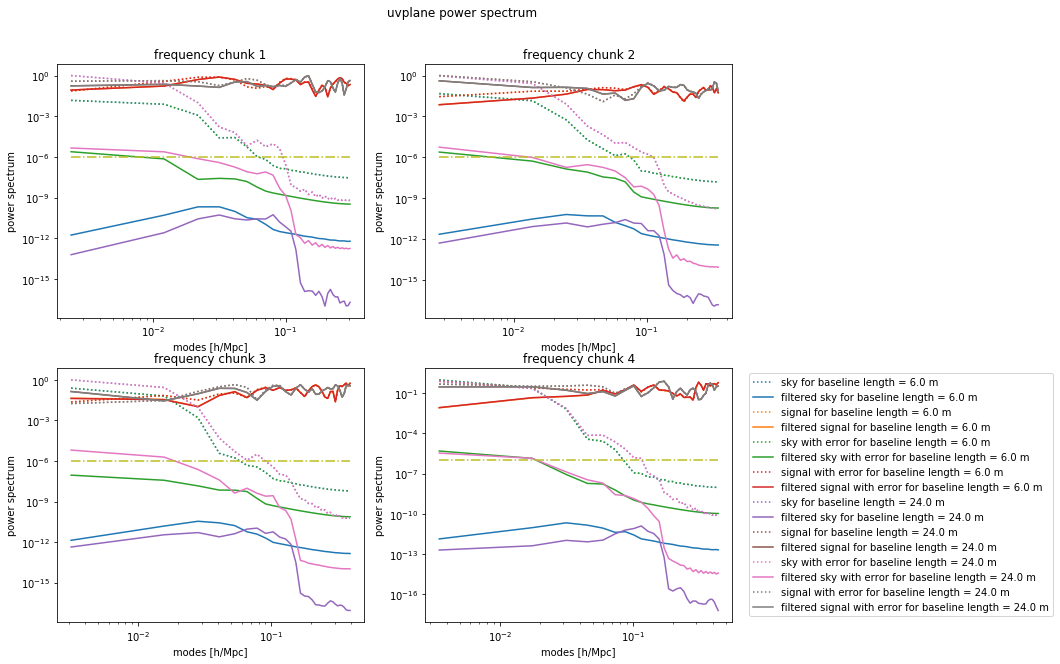

In [14]:
# Plot
Nfreqchunks = 4
#baselines = [0, t.unique_baseline_lengths.shape[0]//2, t.unique_baseline_lengths.shape[0]-1]
baselines = [0,t.unique_baseline_lengths.shape[0]//2]
fig = plt.figure(figsize=(15,10))
for i in range(Nfreqchunks):
    max_sky = np.max(ps_sky[i])
    max_sig = np.max(ps_sig[i])
    max_sky_error = np.max(ps_sky_error[i])
    max_sig_error = np.max(ps_sig_error[i])
    plt.subplot(2,Nfreqchunks//2,i+1)
    modes = k_modes[i]
    m = t.unique_baseline_lengths.shape[0]//baselines_binned.shape[0]
    ax = plt.gca()
    for b in baselines:
        baseline_idx_binned = b//m # Divide by the m argument of get_uvplane_ps
        bl = t.unique_baseline_lengths[b]
        # Without error
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sky[i][:,baseline_idx_binned]/max_sky,
                   linestyle=':', color=color, label=f'sky for baseline length = {bl} m')
        plt.loglog(modes, ps_skyf[i][:,baseline_idx_binned]/max_sky,
                   linestyle='-', color=color, label=f'filtered sky for baseline length = {bl} m')
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sig[i][:,baseline_idx_binned]/max_sig,
                   linestyle=':', color=color, label=f'signal for baseline length = {bl} m')
        plt.loglog(modes, ps_sigf[i][:,baseline_idx_binned]/max_sig,
                   linestyle='-', color=color, label=f'filtered signal for baseline length = {bl} m')
        # With error
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sky_error[i][:,baseline_idx_binned]/max_sky_error,
                   linestyle=':', color=color, label=f'sky with error for baseline length = {bl} m')
        plt.loglog(modes, ps_skyf_error[i][:,baseline_idx_binned]/max_sky_error,
                   linestyle='-', color=color, label=f'filtered sky with error for baseline length = {bl} m')
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sig_error[i][:,baseline_idx_binned]/max_sig_error,
                   linestyle=':', color=color, label=f'signal with error for baseline length = {bl} m')
        plt.loglog(modes, ps_sigf_error[i][:,baseline_idx_binned]/max_sig_error,
                   linestyle='-', color=color, label=f'filtered signal with error for baseline length = {bl} m')
    # Add line at 1e-6
    line = np.array([1e-6 for i in range(len(modes))])
    color = next(ax._get_lines.prop_cycler)['color']
    plt.loglog(modes, line, linestyle='-.', color=color)
    plt.xlabel('modes [h/Mpc]')
    plt.ylabel('power spectrum')
    #plt.ylim(1e-12, 1)
    plt.title('frequency chunk {}'.format(i+1))
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.9, right=0.75)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.suptitle('uvplane power spectrum')
plt.show()

Below we plot power spectra of the image (rmap) data.

In [15]:
# Initialize non-redundant telescope array
ndishes = 8
npix = 4096
redundant = False
seed = 0
t = telescope_1d.Telescope1D(Ndishes=ndishes, Npix_fft=npix, redundant=redundant, seed=seed)

# Generate sky (foregrounds; white noise in angle but frequncy independent)
sky = 1000*t.get_uniform_sky(high=2, seed=seed)
    
# Generate signal (white noise in both freqency and angle)
np.random.seed(seed)
signal = np.random.normal(0,1,(t.Nfreq,t.Npix))

# Convolve and convert image to uvplane
uvsky = t.observe_image(sky)
uvsig = t.observe_image(signal) 

# Get real space maps
rmap_sky = t.get_obs_rmap(uvsky, time_error_sigma=0, filter_FG=False)
rmap_sig = t.get_obs_rmap(uvsig, time_error_sigma=0, filter_FG=False)
rmap_skyf = t.get_obs_rmap(uvsky, time_error_sigma=0, filter_FG=True)
rmap_sigf = t.get_obs_rmap(uvsig, time_error_sigma=0, filter_FG=True)
rmap_sky_error = t.get_obs_rmap(uvsky, time_error_sigma=10e-12, filter_FG=False)
rmap_sig_error = t.get_obs_rmap(uvsig, time_error_sigma=10e-12, filter_FG=False)
rmap_skyf_error = t.get_obs_rmap(uvsky, time_error_sigma=10e-12, filter_FG=True)
rmap_sigf_error = t.get_obs_rmap(uvsig, time_error_sigma=10e-12, filter_FG=True)

# Power spectra of foregrounds, filtered foregrounds, signal, filtered signal
(ps_sky, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sky, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sig, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sig, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_skyf, k_modes, alpha_binned) = t.get_rmap_ps(rmap_skyf, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sigf, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sigf, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sky_error, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sky_error, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sig_error, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sig_error, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_skyf_error, k_modes, alpha_binned) = t.get_rmap_ps(rmap_skyf_error, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sigf_error, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sigf_error, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)

Filtered 300 modes.
Filtered 300 modes.
Filtered 300 modes.
Filtered 300 modes.


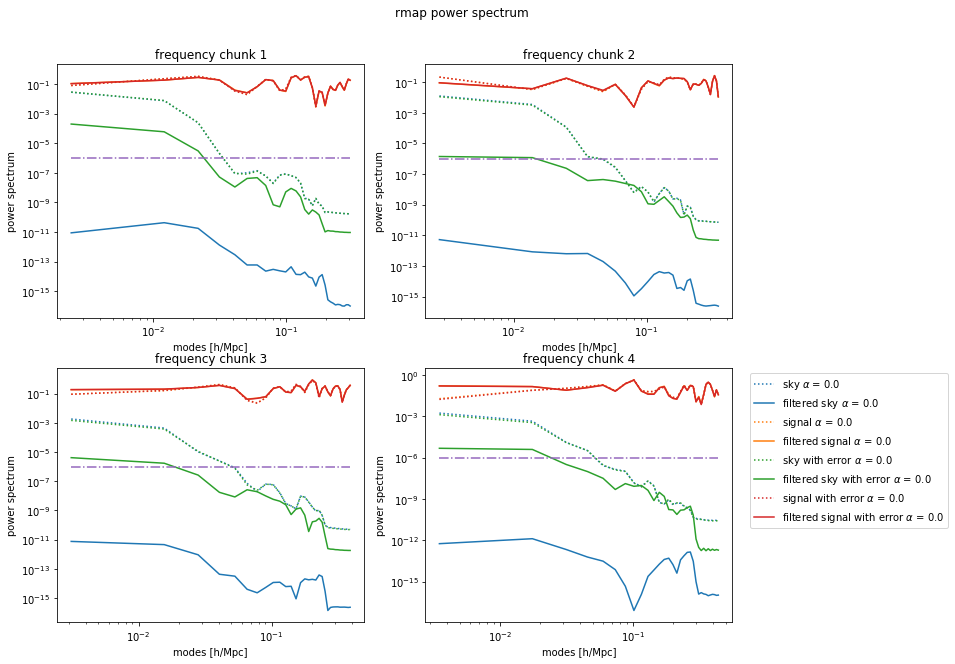

In [16]:
# Plot
Nfreqchunks = 4
alpha_idx_no_source = [t.Npix//2]
fig = plt.figure(figsize=(15,10))
for i in range(Nfreqchunks):
    max_sky = np.max(ps_sky[i])
    max_sig = np.max(ps_sig[i])
    max_sky_error = np.max(ps_sky_error[i])
    max_sig_error = np.max(ps_sig_error[i])
    plt.subplot(2,Nfreqchunks//2,i+1)
    modes = k_modes[i]
    m = t.alpha.shape[0]//alpha_binned.shape[0]
    ax = plt.gca()
    for a in alpha_idx_no_source:
        alpha_idx_binned = a//m
        alpha = t.alpha[a]
        # Without error
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sky[i][:,alpha_idx_binned]/max_sky,
                   linestyle=':', color=color, label=fr'sky $\alpha$ = {alpha}')
        plt.loglog(modes, ps_skyf[i][:,alpha_idx_binned]/max_sky,
                   linestyle='-', color=color, label=fr'filtered sky $\alpha$ = {alpha}')
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sig[i][:,alpha_idx_binned]/max_sig,
                   linestyle=':', color=color, label=fr'signal $\alpha$ = {alpha}')
        plt.loglog(modes, ps_sigf[i][:,alpha_idx_binned]/max_sig,
                   linestyle='-', color=color, label=fr'filtered signal $\alpha$ = {alpha}')
        # With error
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sky_error[i][:,alpha_idx_binned]/max_sky_error,
                   linestyle=':', color=color, label=fr'sky with error $\alpha$ = {alpha}')
        plt.loglog(modes, ps_skyf_error[i][:,alpha_idx_binned]/max_sky_error,
                   linestyle='-', color=color, label=fr'filtered sky with error $\alpha$ = {alpha}')
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sig_error[i][:,alpha_idx_binned]/max_sig_error,
                   linestyle=':', color=color, label=fr'signal with error $\alpha$ = {alpha}')
        plt.loglog(modes, ps_sigf_error[i][:,alpha_idx_binned]/max_sig_error,
                   linestyle='-', color=color, label=fr'filtered signal with error $\alpha$ = {alpha}')
    # Add line at 1e-6
    line = np.array([1e-6 for i in range(len(modes))])
    color = next(ax._get_lines.prop_cycler)['color']
    plt.loglog(modes, line, linestyle='-.', color=color)
    plt.xlabel('modes [h/Mpc]')
    plt.ylabel('power spectrum')
    #plt.ylim(1e-11, 1)
    plt.title('frequency chunk {}'.format(i+1))
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.9, right=0.75)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.suptitle('rmap power spectrum')
plt.show()

In [17]:
# Initialize redundant telescope array
ndishes = 8
npix = 4096
redundant = True
seed = 0
t = telescope_1d.Telescope1D(Ndishes=ndishes, Npix_fft=npix, redundant=redundant, seed=seed)

# Generate sky (foregrounds; white noise in angle but frequncy independent)
sky = 1000*t.get_uniform_sky(high=2, seed=seed)
    
# Generate signal (white noise in both freqency and angle)
np.random.seed(seed)
signal = np.random.normal(0,1,(t.Nfreq,t.Npix))

# Convolve and convert image to uvplane
uvsky = t.observe_image(sky)
uvsig = t.observe_image(signal) 

# Get real space maps
rmap_sky = t.get_obs_rmap(uvsky, time_error_sigma=0, filter_FG=False)
rmap_sig = t.get_obs_rmap(uvsig, time_error_sigma=0, filter_FG=False)
rmap_skyf = t.get_obs_rmap(uvsky, time_error_sigma=0, filter_FG=True)
rmap_sigf = t.get_obs_rmap(uvsig, time_error_sigma=0, filter_FG=True)
rmap_sky_error = t.get_obs_rmap(uvsky, time_error_sigma=10e-12, filter_FG=False)
rmap_sig_error = t.get_obs_rmap(uvsig, time_error_sigma=10e-12, filter_FG=False)
rmap_skyf_error = t.get_obs_rmap(uvsky, time_error_sigma=10e-12, filter_FG=True)
rmap_sigf_error = t.get_obs_rmap(uvsig, time_error_sigma=10e-12, filter_FG=True)

# Power spectra of foregrounds, filtered foregrounds, signal, filtered signal
(ps_sky, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sky, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sig, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sig, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_skyf, k_modes, alpha_binned) = t.get_rmap_ps(rmap_skyf, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sigf, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sigf, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sky_error, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sky_error, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sig_error, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sig_error, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_skyf_error, k_modes, alpha_binned) = t.get_rmap_ps(rmap_skyf_error, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sigf_error, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sigf_error, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)

Filtered 248 modes.
Filtered 248 modes.
Filtered 248 modes.
Filtered 248 modes.


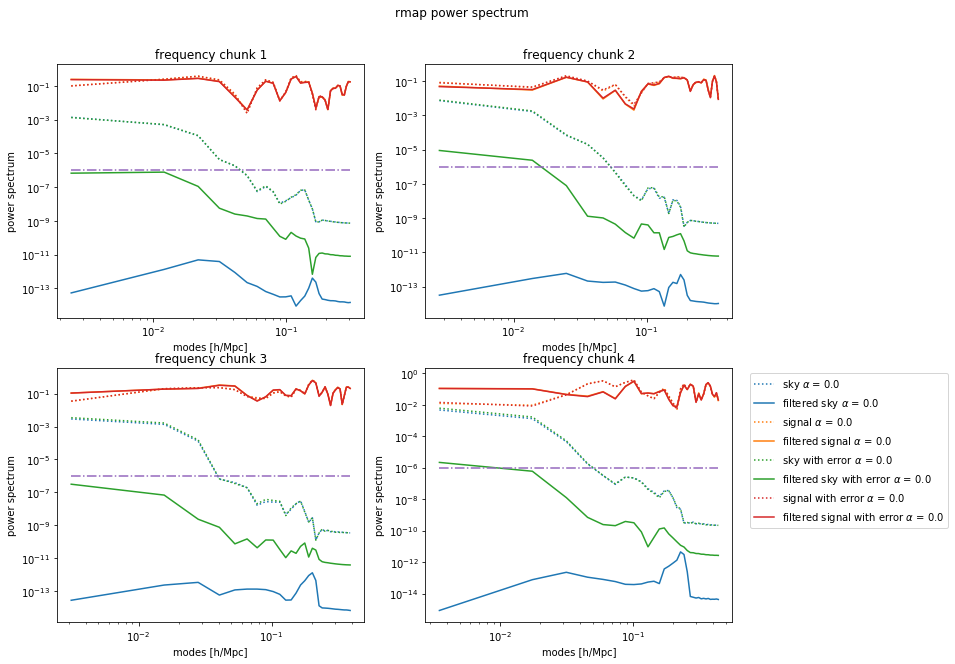

In [18]:
# Plot
Nfreqchunks = 4
alpha_idx_no_source = [t.Npix//2]
fig = plt.figure(figsize=(15,10))
for i in range(Nfreqchunks):
    max_sky = np.max(ps_sky[i])
    max_sig = np.max(ps_sig[i])
    max_sky_error = np.max(ps_sky_error[i])
    max_sig_error = np.max(ps_sig_error[i])
    plt.subplot(2,Nfreqchunks//2,i+1)
    modes = k_modes[i]
    m = t.alpha.shape[0]//alpha_binned.shape[0]
    ax = plt.gca()
    for a in alpha_idx_no_source:
        alpha_idx_binned = a//m
        alpha = t.alpha[a]
        # Without error
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sky[i][:,alpha_idx_binned]/max_sky,
                   linestyle=':', color=color, label=fr'sky $\alpha$ = {alpha}')
        plt.loglog(modes, ps_skyf[i][:,alpha_idx_binned]/max_sky,
                   linestyle='-', color=color, label=fr'filtered sky $\alpha$ = {alpha}')
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sig[i][:,alpha_idx_binned]/max_sig,
                   linestyle=':', color=color, label=fr'signal $\alpha$ = {alpha}')
        plt.loglog(modes, ps_sigf[i][:,alpha_idx_binned]/max_sig,
                   linestyle='-', color=color, label=fr'filtered signal $\alpha$ = {alpha}')
        # With error
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sky_error[i][:,alpha_idx_binned]/max_sky_error,
                   linestyle=':', color=color, label=fr'sky with error $\alpha$ = {alpha}')
        plt.loglog(modes, ps_skyf_error[i][:,alpha_idx_binned]/max_sky_error,
                   linestyle='-', color=color, label=fr'filtered sky with error $\alpha$ = {alpha}')
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sig_error[i][:,alpha_idx_binned]/max_sig_error,
                   linestyle=':', color=color, label=fr'signal with error $\alpha$ = {alpha}')
        plt.loglog(modes, ps_sigf_error[i][:,alpha_idx_binned]/max_sig_error,
                   linestyle='-', color=color, label=fr'filtered signal with error $\alpha$ = {alpha}')
    # Add line at 1e-6
    line = np.array([1e-6 for i in range(len(modes))])
    color = next(ax._get_lines.prop_cycler)['color']
    plt.loglog(modes, line, linestyle='-.', color=color)
    plt.xlabel('modes [h/Mpc]')
    plt.ylabel('power spectrum')
    #plt.ylim(1e-11, 1)
    plt.title('frequency chunk {}'.format(i+1))
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.9, right=0.75)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.suptitle('rmap power spectrum')
plt.show()

In [19]:
# Try larger error, still using redundant array
rmap_sky_error_2 = t.get_obs_rmap(uvsky, time_error_sigma=100e-12, filter_FG=False)
rmap_sig_error_2 = t.get_obs_rmap(uvsig, time_error_sigma=100e-12, filter_FG=False)
rmap_skyf_error_2 = t.get_obs_rmap(uvsky, time_error_sigma=100e-12, filter_FG=True)
rmap_sigf_error_2 = t.get_obs_rmap(uvsig, time_error_sigma=100e-12, filter_FG=True)

# Power spectra of foregrounds, filtered foregrounds, signal, filtered signal
(ps_sky_error_2, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sky_error_2, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sig_error_2, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sig_error_2, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_skyf_error_2, k_modes, alpha_binned) = t.get_rmap_ps(rmap_skyf_error_2, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)
(ps_sigf_error_2, k_modes, alpha_binned) = t.get_rmap_ps(rmap_sigf_error_2, Nfreqchunks=4, m_alpha=2, m_freq=2, padding=1, window_fn=np.blackman)

Filtered 248 modes.
Filtered 248 modes.


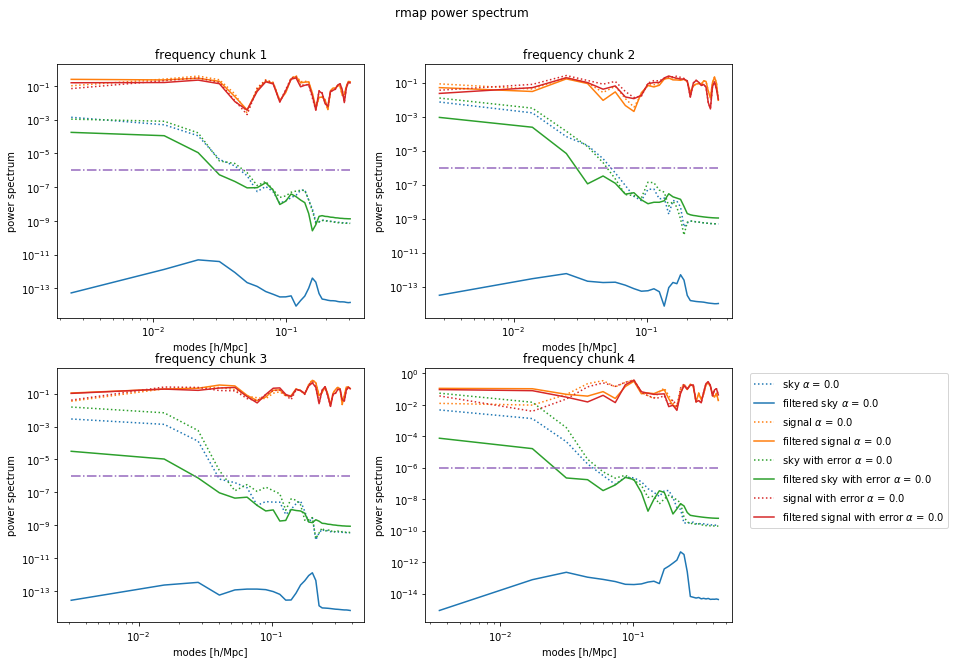

In [20]:
# Plot
Nfreqchunks = 4
alpha_idx_no_source = [t.Npix//2]
fig = plt.figure(figsize=(15,10))
for i in range(Nfreqchunks):
    max_sky = np.max(ps_sky[i])
    max_sig = np.max(ps_sig[i])
    max_sky_error = np.max(ps_sky_error_2[i])
    max_sig_error = np.max(ps_sig_error_2[i])
    plt.subplot(2,Nfreqchunks//2,i+1)
    modes = k_modes[i]
    m = t.alpha.shape[0]//alpha_binned.shape[0]
    ax = plt.gca()
    for a in alpha_idx_no_source:
        alpha_idx_binned = a//m
        alpha = t.alpha[a]
        # Without error
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sky[i][:,alpha_idx_binned]/max_sky,
                   linestyle=':', color=color, label=fr'sky $\alpha$ = {alpha}')
        plt.loglog(modes, ps_skyf[i][:,alpha_idx_binned]/max_sky,
                   linestyle='-', color=color, label=fr'filtered sky $\alpha$ = {alpha}')
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sig[i][:,alpha_idx_binned]/max_sig,
                   linestyle=':', color=color, label=fr'signal $\alpha$ = {alpha}')
        plt.loglog(modes, ps_sigf[i][:,alpha_idx_binned]/max_sig,
                   linestyle='-', color=color, label=fr'filtered signal $\alpha$ = {alpha}')
        # With error
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sky_error_2[i][:,alpha_idx_binned]/max_sky_error,
                   linestyle=':', color=color, label=fr'sky with error $\alpha$ = {alpha}')
        plt.loglog(modes, ps_skyf_error_2[i][:,alpha_idx_binned]/max_sky_error,
                   linestyle='-', color=color, label=fr'filtered sky with error $\alpha$ = {alpha}')
        color = next(ax._get_lines.prop_cycler)['color']
        plt.loglog(modes, ps_sig_error_2[i][:,alpha_idx_binned]/max_sig_error,
                   linestyle=':', color=color, label=fr'signal with error $\alpha$ = {alpha}')
        plt.loglog(modes, ps_sigf_error_2[i][:,alpha_idx_binned]/max_sig_error,
                   linestyle='-', color=color, label=fr'filtered signal with error $\alpha$ = {alpha}')
    # Add line at 1e-6
    line = np.array([1e-6 for i in range(len(modes))])
    color = next(ax._get_lines.prop_cycler)['color']
    plt.loglog(modes, line, linestyle='-.', color=color)
    plt.xlabel('modes [h/Mpc]')
    plt.ylabel('power spectrum')
    #plt.ylim(1e-11, 1)
    plt.title('frequency chunk {}'.format(i+1))
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.9, right=0.75)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.suptitle('rmap power spectrum')
plt.show()